In [7]:
import pandas as pd
import numpy as np
import torch
from torch.optim import Adam

import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

from dataset import split_trainValTest
from trainer import train_AgeVae
from model import VAEAge, TwoLayerNetwork

In [8]:
data = pd.read_csv("./Data/Aging_data_combined_orthologs.csv")
datawNAN = data[data['Tissue'] == "Brain"].fillna(0)
datawNAN = torch.Tensor(datawNAN.select_dtypes(include=['float64']).iloc[:, :-1].values)

In [9]:
print([(len(data[data["Tissue"] == tis]), tis) for tis in data["Tissue"].unique()])

[(211, 'Liver'), (112, 'Lung'), (187, 'Kidney'), (95, 'Heart'), (167, 'Muscle'), (1190, 'Brain'), (43, 'BAT'), (50, 'SCAT'), (46, 'WBC'), (47, 'Small Intestine'), (46, 'Spleen'), (46, 'Pancreas'), (49, 'Bone'), (46, 'GAT'), (50, 'MAT'), (45, 'Skin'), (46, 'Marrow'), (133, 'DermalFibroblasts')]


In [10]:
data.shape

(2609, 15818)

In [27]:
batch_size = 64
validation_split = .1
test_split = .0
l1_lambda, l2_lambda = 0.03, 0.01
input_size = datawNAN.shape[1] - 1
latent_size = 10
down_channels, up_channels = 2, 2
hidden_size = [10, 20]
lr = 1e-4
epochs = 1000

In [28]:
train_loader, val_loader, test_loader = split_trainValTest(datawNAN, batch_size, validation_split, test_split)
AgeModel = TwoLayerNetwork(latent_size, l1_lambda, l2_lambda, hidden_size)
vae = VAEAge(input_size, AgeModel, latent_size, down_channels, up_channels)
vae_optim = Adam(vae.parameters(), lr)
train_AgeVae(vae, train_loader, val_loader, batch_size, epochs, vae_optim)

age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.3708, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4737, device='cuda:0') 64 tensor(1.0845, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 1 | Age r2: -26.43453085422516 | Age loss: 1.1130847558379173 |Age reg: 3.0186848789453506 | MSE loss: 17222.29345703125 | R2: -3.331011101603508 | KLD loss: 11.236320219933987
Epoch 1 | Age r2 val: -24.53738784790039 | Age loss val: 1.0398987531661987 | MSE loss val: 15445.615234375 | R2 val: -3.8513259887695312 | KLD loss val: 5.917009353637695
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.3933, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3125, 

Epoch 12 | Age r2: -20.28085368871689 | Age loss: 0.983083937317133 |Age reg: 2.827994540333748 | MSE loss: 2279.8585662841797 | R2: 0.4270864687860012 | KLD loss: 27.211121797561646
Epoch 12 | Age r2 val: -24.218170166015625 | Age loss val: 1.010138988494873 | MSE loss val: 2076.9140625 | R2 val: 0.2794504761695862 | KLD loss val: 26.62381362915039
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.4069, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4155, device='cuda:0') 64 tensor(0.9890, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 13 | Age r2: -20.26714539527893 | Age loss: 0.9807776622474194 |Age reg: 2.8114748150110245 | MSE loss: 2078.7614212036133 | R2: 0.4855160266160965 | KLD loss: 27.067052364349365
Epoch 13 | Age r2 val: -21.207168579101562 | Age loss val: 0.985145628452301 | MSE loss val: 2229.6894

Epoch 24 | Age r2: -18.476899564266205 | Age loss: 0.935983695089817 |Age reg: 2.6349994391202927 | MSE loss: 1440.7754669189453 | R2: 0.6438389271497726 | KLD loss: 27.228671312332153
Epoch 24 | Age r2 val: -23.338090896606445 | Age loss val: 0.9627152681350708 | MSE loss val: 1499.31396484375 | R2 val: 0.6253058910369873 | KLD loss val: 27.411029815673828
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.4586, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.0332, device='cuda:0') 64 tensor(0.9149, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 25 | Age r2: -17.98736870288849 | Age loss: 0.9291891902685165 |Age reg: 2.6196538358926773 | MSE loss: 1351.7472763061523 | R2: 0.6650488413870335 | KLD loss: 27.105658411979675
Epoch 25 | Age r2 val: -16.167325973510742 | Age loss val: 0.9223688840866089 | MSE loss val: 

Epoch 36 | Age r2: -15.995375275611877 | Age loss: 0.8840786665678024 |Age reg: 2.4567855447530746 | MSE loss: 1040.2772598266602 | R2: 0.7413470633327961 | KLD loss: 25.674193143844604
Epoch 36 | Age r2 val: -16.52732276916504 | Age loss val: 0.9017015099525452 | MSE loss val: 944.8092041015625 | R2 val: 0.7166329622268677 | KLD loss val: 25.93398666381836
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.5472, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3490, device='cuda:0') 64 tensor(0.8772, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 37 | Age r2: -15.844793617725372 | Age loss: 0.8784406036138535 |Age reg: 2.442535489797592 | MSE loss: 1031.6375312805176 | R2: 0.7412177734076977 | KLD loss: 25.37320387363434
Epoch 37 | Age r2 val: -17.456439971923828 | Age loss val: 0.9132654070854187 | MSE loss val: 9

Epoch 48 | Age r2: -15.25908774137497 | Age loss: 0.8513588644564152 |Age reg: 2.291110470890999 | MSE loss: 844.285961151123 | R2: 0.7883775606751442 | KLD loss: 25.611263632774353
Epoch 48 | Age r2 val: -15.739166259765625 | Age loss val: 0.8883742690086365 | MSE loss val: 900.5970458984375 | R2 val: 0.7448934316635132 | KLD loss val: 26.780189514160156
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.4365, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1579, device='cuda:0') 64 tensor(0.8505, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 49 | Age r2: -14.787131667137146 | Age loss: 0.8510952591896057 |Age reg: 2.2779525369405746 | MSE loss: 801.6913833618164 | R2: 0.7990168705582619 | KLD loss: 26.058114171028137
Epoch 49 | Age r2 val: -16.83648109436035 | Age loss val: 0.88044673204422 | MSE loss val: 818.9

Epoch 60 | Age r2: -13.975992739200592 | Age loss: 0.823003139346838 |Age reg: 2.1382326930761337 | MSE loss: 725.2714157104492 | R2: 0.8206653781235218 | KLD loss: 25.715973138809204
Epoch 60 | Age r2 val: -14.887639045715332 | Age loss val: 0.8559525609016418 | MSE loss val: 770.6513671875 | R2 val: 0.7638596296310425 | KLD loss val: 25.881561279296875
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.4103, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3989, device='cuda:0') 64 tensor(0.8613, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 61 | Age r2: -13.959539890289307 | Age loss: 0.8224934823811054 |Age reg: 2.1260090321302414 | MSE loss: 710.4982299804688 | R2: 0.8217331059277058 | KLD loss: 25.75584590435028
Epoch 61 | Age r2 val: -16.924253463745117 | Age loss val: 0.8587672710418701 | MSE loss val: 658.

Epoch 72 | Age r2: -12.865694761276245 | Age loss: 0.79499601572752 |Age reg: 1.9957477524876595 | MSE loss: 634.2783546447754 | R2: 0.8428649678826332 | KLD loss: 26.30254578590393
Epoch 72 | Age r2 val: -16.868022918701172 | Age loss val: 0.8403393626213074 | MSE loss val: 749.6719970703125 | R2 val: 0.7771131992340088 | KLD loss val: 26.62187957763672
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(1.8875, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.6898, device='cuda:0') 64 tensor(0.7947, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 73 | Age r2: -12.936307787895203 | Age loss: 0.7992339581251144 |Age reg: 1.9842154458165169 | MSE loss: 646.9203681945801 | R2: 0.8347722068428993 | KLD loss: 26.44048261642456
Epoch 73 | Age r2 val: -14.874669075012207 | Age loss val: 0.8239237070083618 | MSE loss val: 676.0

Epoch 84 | Age r2: -11.923259139060974 | Age loss: 0.7660201415419579 |Age reg: 1.8627004101872444 | MSE loss: 563.7573223114014 | R2: 0.8586694821715355 | KLD loss: 26.46697187423706
Epoch 84 | Age r2 val: -13.748265266418457 | Age loss val: 0.7853633165359497 | MSE loss val: 614.8211669921875 | R2 val: 0.8145757913589478 | KLD loss val: 27.023447036743164
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.4497, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3158, device='cuda:0') 64 tensor(0.7756, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 85 | Age r2: -11.684943854808807 | Age loss: 0.7640056237578392 |Age reg: 1.8520778343081474 | MSE loss: 600.0451259613037 | R2: 0.85029336810112 | KLD loss: 26.503464460372925
Epoch 85 | Age r2 val: -14.575353622436523 | Age loss val: 0.8058260083198547 | MSE loss val: 62

Epoch 96 | Age r2: -11.057582795619965 | Age loss: 0.7386683337390423 |Age reg: 1.742166481912136 | MSE loss: 538.3243179321289 | R2: 0.8653285726904869 | KLD loss: 26.876307249069214
Epoch 96 | Age r2 val: -13.577347755432129 | Age loss val: 0.769787609577179 | MSE loss val: 540.500732421875 | R2 val: 0.8417835235595703 | KLD loss val: 26.994094848632812
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.4571, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1579, device='cuda:0') 64 tensor(0.7146, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 97 | Age r2: -11.22644418478012 | Age loss: 0.7376932874321938 |Age reg: 1.732584036886692 | MSE loss: 561.3562049865723 | R2: 0.8587672412395477 | KLD loss: 26.87270712852478
Epoch 97 | Age r2 val: -14.300485610961914 | Age loss val: 0.788443386554718 | MSE loss val: 576.44

Epoch 108 | Age r2: -10.046148240566254 | Age loss: 0.7117311209440231 |Age reg: 1.6303032636642456 | MSE loss: 542.9011573791504 | R2: 0.8617862090468407 | KLD loss: 27.43979001045227
Epoch 108 | Age r2 val: -11.525288581848145 | Age loss val: 0.7382556200027466 | MSE loss val: 574.7064208984375 | R2 val: 0.843598484992981 | KLD loss val: 27.2725830078125
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.2307, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3574, device='cuda:0') 64 tensor(0.6978, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 109 | Age r2: -10.270396053791046 | Age loss: 0.7134617753326893 |Age reg: 1.621277078986168 | MSE loss: 524.1885242462158 | R2: 0.8705569207668304 | KLD loss: 27.439644694328308
Epoch 109 | Age r2 val: -9.622024536132812 | Age loss val: 0.747491717338562 | MSE loss val: 63

Epoch 120 | Age r2: -9.336029291152954 | Age loss: 0.6863597892224789 |Age reg: 1.5271540880203247 | MSE loss: 508.32347869873047 | R2: 0.8720999211072922 | KLD loss: 27.511375904083252
Epoch 120 | Age r2 val: -8.882392883300781 | Age loss val: 0.711107611656189 | MSE loss val: 518.6409301757812 | R2 val: 0.8635004162788391 | KLD loss val: 27.085439682006836
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(1.5292, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7563, device='cuda:0') 64 tensor(0.6625, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 121 | Age r2: -9.325789391994476 | Age loss: 0.6826790757477283 |Age reg: 1.5189142376184464 | MSE loss: 521.2729091644287 | R2: 0.8645801953971386 | KLD loss: 27.7590069770813
Epoch 121 | Age r2 val: -8.890769004821777 | Age loss val: 0.711321234703064 | MSE loss val: 554

Epoch 132 | Age r2: -8.461690038442612 | Age loss: 0.6577864214777946 |Age reg: 1.434316486120224 | MSE loss: 474.88488578796387 | R2: 0.8797983415424824 | KLD loss: 28.076517343521118
Epoch 132 | Age r2 val: -8.941423416137695 | Age loss val: 0.6919726729393005 | MSE loss val: 465.0576171875 | R2 val: 0.8679323792457581 | KLD loss val: 28.151357650756836
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.3942, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1579, device='cuda:0') 64 tensor(0.6522, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 133 | Age r2: -8.465898782014847 | Age loss: 0.6575293056666851 |Age reg: 1.4269862622022629 | MSE loss: 488.71825981140137 | R2: 0.876226082444191 | KLD loss: 28.059388518333435
Epoch 133 | Age r2 val: -9.169318199157715 | Age loss val: 0.7195810675621033 | MSE loss val: 55

Epoch 144 | Age r2: -7.998563170433044 | Age loss: 0.6333173364400864 |Age reg: 1.351197637617588 | MSE loss: 463.9739685058594 | R2: 0.8860524259507656 | KLD loss: 28.132967591285706
Epoch 144 | Age r2 val: -11.86546802520752 | Age loss val: 0.6914167404174805 | MSE loss val: 458.1563720703125 | R2 val: 0.8741259574890137 | KLD loss val: 27.907764434814453
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2662, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4571, device='cuda:0') 64 tensor(0.6461, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 145 | Age r2: -8.323173195123672 | Age loss: 0.636582225561142 |Age reg: 1.3444588705897331 | MSE loss: 489.9417839050293 | R2: 0.876350536942482 | KLD loss: 28.257664918899536
Epoch 145 | Age r2 val: -8.165641784667969 | Age loss val: 0.6547022461891174 | MSE loss val: 511

Epoch 156 | Age r2: -7.257247120141983 | Age loss: 0.612435843795538 |Age reg: 1.276004634797573 | MSE loss: 454.97671699523926 | R2: 0.8860918991267681 | KLD loss: 28.49874782562256
Epoch 156 | Age r2 val: -7.671029090881348 | Age loss val: 0.6405109167098999 | MSE loss val: 548.920166015625 | R2 val: 0.8307398557662964 | KLD loss val: 29.213773727416992
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.3852, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1163, device='cuda:0') 64 tensor(0.6099, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 157 | Age r2: -7.273810625076294 | Age loss: 0.6109599992632866 |Age reg: 1.2700362652540207 | MSE loss: 448.30454444885254 | R2: 0.8860751055181026 | KLD loss: 28.6567862033844
Epoch 157 | Age r2 val: -6.735523223876953 | Age loss val: 0.6371684074401855 | MSE loss val: 463

Epoch 168 | Age r2: -6.530108541250229 | Age loss: 0.5866443328559399 |Age reg: 1.2073946967720985 | MSE loss: 444.43299293518066 | R2: 0.8891650624573231 | KLD loss: 28.62050437927246
Epoch 168 | Age r2 val: -7.775053977966309 | Age loss val: 0.617067813873291 | MSE loss val: 473.9556884765625 | R2 val: 0.8649166822433472 | KLD loss val: 28.840717315673828
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.0325, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1579, device='cuda:0') 64 tensor(0.5887, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 169 | Age r2: -6.61597752571106 | Age loss: 0.5847473703324795 |Age reg: 1.201979212462902 | MSE loss: 448.895450592041 | R2: 0.8868830651044846 | KLD loss: 28.52169919013977
Epoch 169 | Age r2 val: -7.317901611328125 | Age loss val: 0.6119608283042908 | MSE loss val: 425.

Epoch 180 | Age r2: -6.215985655784607 | Age loss: 0.567620862275362 |Age reg: 1.1439798176288605 | MSE loss: 464.6863842010498 | R2: 0.8833468481898308 | KLD loss: 28.673805832862854
Epoch 180 | Age r2 val: -6.544669151306152 | Age loss val: 0.6007148623466492 | MSE loss val: 581.3642578125 | R2 val: 0.8030985593795776 | KLD loss val: 28.529678344726562
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.0144, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2410, device='cuda:0') 64 tensor(0.6478, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 181 | Age r2: -6.186134964227676 | Age loss: 0.57064438611269 |Age reg: 1.1391174048185349 | MSE loss: 452.2122097015381 | R2: 0.8867109902203083 | KLD loss: 28.766082525253296
Epoch 181 | Age r2 val: -6.04495906829834 | Age loss val: 0.5896736979484558 | MSE loss val: 483.306

Epoch 192 | Age r2: -5.569780468940735 | Age loss: 0.543037049472332 |Age reg: 1.086798056960106 | MSE loss: 423.29969215393066 | R2: 0.8936630599200726 | KLD loss: 29.186748385429382
Epoch 192 | Age r2 val: -5.957498550415039 | Age loss val: 0.5753753185272217 | MSE loss val: 466.150634765625 | R2 val: 0.8626822233200073 | KLD loss val: 28.835529327392578
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(1.3327, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7396, device='cuda:0') 64 tensor(0.5261, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 193 | Age r2: -5.561635762453079 | Age loss: 0.5417717434465885 |Age reg: 1.082391895353794 | MSE loss: 420.388858795166 | R2: 0.893943440169096 | KLD loss: 28.907294154167175
Epoch 193 | Age r2 val: -5.872311115264893 | Age loss val: 0.5714872479438782 | MSE loss val: 488.5

Epoch 204 | Age r2: -4.966407209634781 | Age loss: 0.5212453287094831 |Age reg: 1.0363800898194313 | MSE loss: 424.9440402984619 | R2: 0.8935946747660637 | KLD loss: 28.675913333892822
Epoch 204 | Age r2 val: -5.362995147705078 | Age loss val: 0.5317623615264893 | MSE loss val: 416.6092224121094 | R2 val: 0.8896474838256836 | KLD loss val: 28.353151321411133
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.2709, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5263, device='cuda:0') 64 tensor(0.5762, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 205 | Age r2: -5.093059033155441 | Age loss: 0.5191127452999353 |Age reg: 1.0326217710971832 | MSE loss: 402.8677291870117 | R2: 0.8981501124799252 | KLD loss: 28.590699553489685
Epoch 205 | Age r2 val: -5.06730842590332 | Age loss val: 0.5436058640480042 | MSE loss val: 

Epoch 216 | Age r2: -4.6543723195791245 | Age loss: 0.5005261357873678 |Age reg: 0.9925136938691139 | MSE loss: 402.8562412261963 | R2: 0.8990717269480228 | KLD loss: 28.92266583442688
Epoch 216 | Age r2 val: -6.4089131355285645 | Age loss val: 0.54441237449646 | MSE loss val: 408.4263916015625 | R2 val: 0.8834632635116577 | KLD loss val: 28.87023162841797
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(1.0174, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.8643, device='cuda:0') 64 tensor(0.4913, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 217 | Age r2: -4.551625490188599 | Age loss: 0.5004445780068636 |Age reg: 0.9890468865633011 | MSE loss: 425.54933166503906 | R2: 0.8913213983178139 | KLD loss: 29.0583918094635
Epoch 217 | Age r2 val: -5.348308563232422 | Age loss val: 0.5327441692352295 | MSE loss val: 429

Epoch 228 | Age r2: -4.0180826634168625 | Age loss: 0.4763177689164877 |Age reg: 0.9514428526163101 | MSE loss: 401.6642894744873 | R2: 0.900740846991539 | KLD loss: 29.01141846179962
Epoch 228 | Age r2 val: -3.9153170585632324 | Age loss val: 0.5061947703361511 | MSE loss val: 463.3905334472656 | R2 val: 0.8580373525619507 | KLD loss val: 29.39944839477539
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.4441, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4737, device='cuda:0') 64 tensor(0.4681, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 229 | Age r2: -3.860275223851204 | Age loss: 0.470843780785799 |Age reg: 0.9480389580130577 | MSE loss: 390.46788024902344 | R2: 0.9026960097253323 | KLD loss: 29.09720253944397
Epoch 229 | Age r2 val: -3.3306784629821777 | Age loss val: 0.4865952730178833 | MSE loss val: 4

Epoch 240 | Age r2: -3.6499254554510117 | Age loss: 0.45599239133298397 |Age reg: 0.912445891648531 | MSE loss: 421.37755966186523 | R2: 0.8869770392775536 | KLD loss: 29.28643226623535
Epoch 240 | Age r2 val: -6.462490081787109 | Age loss val: 0.495207816362381 | MSE loss val: 465.3453369140625 | R2 val: 0.8545544743537903 | KLD loss val: 29.76487922668457
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(1.5018, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7563, device='cuda:0') 64 tensor(0.4240, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 241 | Age r2: -3.563797175884247 | Age loss: 0.454455703496933 |Age reg: 0.9091775938868523 | MSE loss: 412.1042194366455 | R2: 0.8966267518699169 | KLD loss: 29.07763135433197
Epoch 241 | Age r2 val: -4.466228008270264 | Age loss val: 0.48121824860572815 | MSE loss val: 55

Epoch 252 | Age r2: -3.1594364643096924 | Age loss: 0.43135873414576054 |Age reg: 0.876198697835207 | MSE loss: 391.8805732727051 | R2: 0.902327261865139 | KLD loss: 29.27964460849762
Epoch 252 | Age r2 val: -3.7981677055358887 | Age loss val: 0.46223127841949463 | MSE loss val: 502.52789306640625 | R2 val: 0.8323043584823608 | KLD loss val: 29.13616180419922
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.1857, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1413, device='cuda:0') 64 tensor(0.4199, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 253 | Age r2: -2.980022042989731 | Age loss: 0.4282799903303385 |Age reg: 0.8730922564864159 | MSE loss: 375.2814826965332 | R2: 0.9068967550992966 | KLD loss: 29.170113444328308
Epoch 253 | Age r2 val: -5.520533084869385 | Age loss val: 0.4850185811519623 | MSE loss val

Epoch 264 | Age r2: -2.779512658715248 | Age loss: 0.41343699768185616 |Age reg: 0.8411317057907581 | MSE loss: 391.07211685180664 | R2: 0.9030237458646297 | KLD loss: 29.193312644958496
Epoch 264 | Age r2 val: -2.6491098403930664 | Age loss val: 0.43845751881599426 | MSE loss val: 436.6443786621094 | R2 val: 0.8636872172355652 | KLD loss val: 29.537174224853516
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3881, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4737, device='cuda:0') 64 tensor(0.4192, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 265 | Age r2: -2.769469991326332 | Age loss: 0.4121886305510998 |Age reg: 0.8381568305194378 | MSE loss: 378.594202041626 | R2: 0.9036283530294895 | KLD loss: 29.180168390274048
Epoch 265 | Age r2 val: -3.2096123695373535 | Age loss val: 0.45802924036979675 | MSE loss 

Epoch 276 | Age r2: -2.535911336541176 | Age loss: 0.39808530174195766 |Age reg: 0.8085645921528339 | MSE loss: 382.88856506347656 | R2: 0.9048836827278137 | KLD loss: 29.301479697227478
Epoch 276 | Age r2 val: -2.7786262035369873 | Age loss val: 0.4187764525413513 | MSE loss val: 431.8050231933594 | R2 val: 0.8616896867752075 | KLD loss val: 30.217144012451172
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.1356, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4375, device='cuda:0') 64 tensor(0.3899, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 277 | Age r2: -2.392490938305855 | Age loss: 0.3920397274196148 |Age reg: 0.8057753220200539 | MSE loss: 370.2554359436035 | R2: 0.908593088388443 | KLD loss: 29.330402612686157
Epoch 277 | Age r2 val: -2.5188257694244385 | Age loss val: 0.43102988600730896 | MSE loss 

Epoch 288 | Age r2: -2.1572255343198776 | Age loss: 0.37430072017014027 |Age reg: 0.7774032391607761 | MSE loss: 373.55349349975586 | R2: 0.9071397297084332 | KLD loss: 29.983880281448364
Epoch 288 | Age r2 val: -2.7254507541656494 | Age loss val: 0.406957745552063 | MSE loss val: 426.84356689453125 | R2 val: 0.8735143542289734 | KLD loss val: 29.64411735534668
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.1692, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1330, device='cuda:0') 64 tensor(0.3566, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 289 | Age r2: -1.8639432936906815 | Age loss: 0.3624787721782923 |Age reg: 0.7747544832527637 | MSE loss: 368.26038932800293 | R2: 0.9088096171617508 | KLD loss: 29.984081268310547
Epoch 289 | Age r2 val: -1.8551719188690186 | Age loss val: 0.3881646692752838 | MSE los

Epoch 300 | Age r2: -1.7888184264302254 | Age loss: 0.35035222955048084 |Age reg: 0.747199222445488 | MSE loss: 382.56254959106445 | R2: 0.903456948697567 | KLD loss: 29.6962171792984
Epoch 300 | Age r2 val: -2.0487465858459473 | Age loss val: 0.37236401438713074 | MSE loss val: 451.39434814453125 | R2 val: 0.8736444711685181 | KLD loss val: 30.019161224365234
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.0436, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3947, device='cuda:0') 64 tensor(0.3345, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 301 | Age r2: -1.655078925192356 | Age loss: 0.3428992163389921 |Age reg: 0.7446737140417099 | MSE loss: 370.660795211792 | R2: 0.9075325429439545 | KLD loss: 29.696656942367554
Epoch 301 | Age r2 val: -2.911543369293213 | Age loss val: 0.37996014952659607 | MSE loss va

Epoch 312 | Age r2: -1.3066790103912354 | Age loss: 0.32313714921474457 |Age reg: 0.7191014364361763 | MSE loss: 369.29371643066406 | R2: 0.9046130999922752 | KLD loss: 29.611509203910828
Epoch 312 | Age r2 val: -1.1694509983062744 | Age loss val: 0.323899507522583 | MSE loss val: 469.4560852050781 | R2 val: 0.8392240405082703 | KLD loss val: 30.80084228515625
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.6954, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5485, device='cuda:0') 64 tensor(0.3055, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 313 | Age r2: -1.3063287660479546 | Age loss: 0.32096333615481853 |Age reg: 0.717136587947607 | MSE loss: 369.8625717163086 | R2: 0.9057445339858532 | KLD loss: 29.62653338909149
Epoch 313 | Age r2 val: -0.8504239320755005 | Age loss val: 0.31312018632888794 | MSE loss v

Epoch 324 | Age r2: -1.0474520400166512 | Age loss: 0.30275634676218033 |Age reg: 0.6935023479163647 | MSE loss: 362.1736488342285 | R2: 0.9088542126119137 | KLD loss: 29.82661008834839
Epoch 324 | Age r2 val: -1.481074333190918 | Age loss val: 0.34504905343055725 | MSE loss val: 418.81292724609375 | R2 val: 0.8939729332923889 | KLD loss val: 29.29582977294922
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.5841, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4405, device='cuda:0') 64 tensor(0.3035, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 325 | Age r2: -0.9781383872032166 | Age loss: 0.2990516349673271 |Age reg: 0.6913937404751778 | MSE loss: 370.5309238433838 | R2: 0.9066097252070904 | KLD loss: 29.663474202156067
Epoch 325 | Age r2 val: -1.0662882328033447 | Age loss val: 0.31901249289512634 | MSE loss 

Epoch 336 | Age r2: -0.8053746894001961 | Age loss: 0.2843279093503952 |Age reg: 0.6690533831715584 | MSE loss: 377.2577648162842 | R2: 0.9051722660660744 | KLD loss: 29.345873594284058
Epoch 336 | Age r2 val: -0.7610151767730713 | Age loss val: 0.2966221272945404 | MSE loss val: 388.8996276855469 | R2 val: 0.896364688873291 | KLD loss val: 29.07766342163086
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.1267, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.0166, device='cuda:0') 64 tensor(0.2703, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 337 | Age r2: -0.7416772469878197 | Age loss: 0.2799301724880934 |Age reg: 0.666931077837944 | MSE loss: 354.284912109375 | R2: 0.9106991626322269 | KLD loss: 29.56626260280609
Epoch 337 | Age r2 val: -1.2637531757354736 | Age loss val: 0.3044907748699188 | MSE loss val: 

Epoch 348 | Age r2: -0.52303047478199 | Age loss: 0.26209431886672974 |Age reg: 0.644830234348774 | MSE loss: 367.63883781433105 | R2: 0.9067171551287174 | KLD loss: 29.98821496963501
Epoch 348 | Age r2 val: -0.6973215341567993 | Age loss val: 0.27238544821739197 | MSE loss val: 417.8345947265625 | R2 val: 0.8778024911880493 | KLD loss val: 29.97742462158203
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.7308, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5485, device='cuda:0') 64 tensor(0.2437, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 349 | Age r2: -0.4572172313928604 | Age loss: 0.25858181342482567 |Age reg: 0.6427677497267723 | MSE loss: 349.5491199493408 | R2: 0.9124825745820999 | KLD loss: 29.932836413383484
Epoch 349 | Age r2 val: -0.4380258321762085 | Age loss val: 0.26654016971588135 | MSE loss v

Epoch 360 | Age r2: -0.35863587632775307 | Age loss: 0.2443687692284584 |Age reg: 0.621630672365427 | MSE loss: 359.48790550231934 | R2: 0.9107319563627243 | KLD loss: 29.406455397605896
Epoch 360 | Age r2 val: -0.1493062973022461 | Age loss val: 0.2401067316532135 | MSE loss val: 461.68011474609375 | R2 val: 0.8248775005340576 | KLD loss val: 31.35879898071289
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(-0.0624, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.0307, device='cuda:0') 64 tensor(0.2590, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 361 | Age r2: -0.3070734404027462 | Age loss: 0.24107575695961714 |Age reg: 0.6196723990142345 | MSE loss: 360.9499740600586 | R2: 0.9101074784994125 | KLD loss: 29.533233165740967
Epoch 361 | Age r2 val: -0.9415743350982666 | Age loss val: 0.2952473759651184 | MSE los

Epoch 372 | Age r2: -0.1119592972099781 | Age loss: 0.2217756249010563 |Age reg: 0.5991415046155453 | MSE loss: 360.96164894104004 | R2: 0.9078723676502705 | KLD loss: 29.71020209789276
Epoch 372 | Age r2 val: -0.6476690769195557 | Age loss val: 0.26332753896713257 | MSE loss val: 406.32476806640625 | R2 val: 0.8733283281326294 | KLD loss val: 29.830421447753906
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.5042, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5153, device='cuda:0') 64 tensor(0.2017, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 373 | Age r2: -0.11290867999196053 | Age loss: 0.21941405721008778 |Age reg: 0.5973683558404446 | MSE loss: 352.33399200439453 | R2: 0.9129341952502728 | KLD loss: 29.512786030769348
Epoch 373 | Age r2 val: -0.3617897033691406 | Age loss val: 0.24208036065101624 | MSE 

Epoch 384 | Age r2: 0.08972670882940292 | Age loss: 0.20220506936311722 |Age reg: 0.5771913826465607 | MSE loss: 368.1328868865967 | R2: 0.9078316129744053 | KLD loss: 29.608693480491638
Epoch 384 | Age r2 val: -0.031685829162597656 | Age loss val: 0.21885524690151215 | MSE loss val: 386.7176513671875 | R2 val: 0.8893828988075256 | KLD loss val: 29.372756958007812
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1776, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1316, device='cuda:0') 64 tensor(0.1757, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 385 | Age r2: 0.09239478409290314 | Age loss: 0.20018475130200386 |Age reg: 0.5754803940653801 | MSE loss: 378.69847869873047 | R2: 0.9033163040876389 | KLD loss: 29.849639773368835
Epoch 385 | Age r2 val: -0.04833197593688965 | Age loss val: 0.2167278528213501 | MSE

Epoch 396 | Age r2: 0.2956470735371113 | Age loss: 0.17726978845894337 |Age reg: 0.5561555400490761 | MSE loss: 343.5617485046387 | R2: 0.9142830297350883 | KLD loss: 29.787570118904114
Epoch 396 | Age r2 val: 0.017413437366485596 | Age loss val: 0.21040867269039154 | MSE loss val: 352.43121337890625 | R2 val: 0.8985593914985657 | KLD loss val: 30.10572052001953
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.7543, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.6482, device='cuda:0') 64 tensor(0.1434, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 397 | Age r2: 0.2877044007182121 | Age loss: 0.17532278317958117 |Age reg: 0.5543877109885216 | MSE loss: 345.62014389038086 | R2: 0.9139410853385925 | KLD loss: 29.66767382621765
Epoch 397 | Age r2 val: -0.24208450317382812 | Age loss val: 0.22528360784053802 | MSE lo

Epoch 408 | Age r2: 0.3915141820907593 | Age loss: 0.16135569661855698 |Age reg: 0.5358140580356121 | MSE loss: 346.30720138549805 | R2: 0.9147545732557774 | KLD loss: 29.48070502281189
Epoch 408 | Age r2 val: 0.08238548040390015 | Age loss val: 0.19787710905075073 | MSE loss val: 417.42718505859375 | R2 val: 0.8717911243438721 | KLD loss val: 29.649675369262695
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3579, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5000, device='cuda:0') 64 tensor(0.1387, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 409 | Age r2: 0.4298293851315975 | Age loss: 0.15731553081423044 |Age reg: 0.534210592508316 | MSE loss: 365.4163017272949 | R2: 0.9086736738681793 | KLD loss: 29.68497395515442
Epoch 409 | Age r2 val: 0.2769308090209961 | Age loss val: 0.18537932634353638 | MSE loss v

Epoch 420 | Age r2: 0.5594058185815811 | Age loss: 0.13920490257441998 |Age reg: 0.5155260115861893 | MSE loss: 347.5982036590576 | R2: 0.9140267297625542 | KLD loss: 29.31684958934784
Epoch 420 | Age r2 val: 0.2998826503753662 | Age loss val: 0.1821584552526474 | MSE loss val: 433.4809875488281 | R2 val: 0.8739787340164185 | KLD loss val: 29.441635131835938
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.4539, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3989, device='cuda:0') 64 tensor(0.1440, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 421 | Age r2: 0.5328614450991154 | Age loss: 0.14375453395769 |Age reg: 0.513961274176836 | MSE loss: 369.82368087768555 | R2: 0.9067662581801414 | KLD loss: 29.619203209877014
Epoch 421 | Age r2 val: 0.3665410280227661 | Age loss val: 0.177647665143013 | MSE loss val: 405

Epoch 432 | Age r2: 0.5798791460692883 | Age loss: 0.13341532554477453 |Age reg: 0.4964067339897156 | MSE loss: 350.9478168487549 | R2: 0.9117104932665825 | KLD loss: 29.827946662902832
Epoch 432 | Age r2 val: 0.28029894828796387 | Age loss val: 0.17433129251003265 | MSE loss val: 364.2084655761719 | R2 val: 0.9026596546173096 | KLD loss val: 29.588306427001953
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.6422, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7230, device='cuda:0') 64 tensor(0.1358, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 433 | Age r2: 0.6149965636432171 | Age loss: 0.1299757664091885 |Age reg: 0.49488104321062565 | MSE loss: 335.9331302642822 | R2: 0.9163967370986938 | KLD loss: 29.744274377822876
Epoch 433 | Age r2 val: 0.17841798067092896 | Age loss val: 0.17607425153255463 | MSE loss

Epoch 444 | Age r2: 0.6830243766307831 | Age loss: 0.11610873183235526 |Age reg: 0.4778456538915634 | MSE loss: 337.51637840270996 | R2: 0.9156960360705853 | KLD loss: 29.86211597919464
Epoch 444 | Age r2 val: 0.5228123664855957 | Age loss val: 0.1375834196805954 | MSE loss val: 425.7555847167969 | R2 val: 0.8333053588867188 | KLD loss val: 31.472400665283203
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1242, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2659, device='cuda:0') 64 tensor(0.1234, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 445 | Age r2: 0.7324875630438328 | Age loss: 0.10795886861160398 |Age reg: 0.47630018554627895 | MSE loss: 358.37615394592285 | R2: 0.9111079648137093 | KLD loss: 29.95584726333618
Epoch 445 | Age r2 val: 0.18667328357696533 | Age loss val: 0.16931310296058655 | MSE loss 

Epoch 456 | Age r2: 0.7963479720056057 | Age loss: 0.09434563387185335 |Age reg: 0.4598982147872448 | MSE loss: 359.86572265625 | R2: 0.9099872373044491 | KLD loss: 29.703378677368164
Epoch 456 | Age r2 val: 0.5385385751724243 | Age loss val: 0.14117030799388885 | MSE loss val: 458.84991455078125 | R2 val: 0.8525229692459106 | KLD loss val: 29.78628158569336
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3050, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3740, device='cuda:0') 64 tensor(0.1290, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 457 | Age r2: 0.7767655029892921 | Age loss: 0.09672948531806469 |Age reg: 0.458517799153924 | MSE loss: 349.73515129089355 | R2: 0.9120512716472149 | KLD loss: 29.64837396144867
Epoch 457 | Age r2 val: 0.3639611601829529 | Age loss val: 0.15819326043128967 | MSE loss val:

Epoch 468 | Age r2: 0.8441629372537136 | Age loss: 0.0819941337686032 |Age reg: 0.44258904084563255 | MSE loss: 344.1098232269287 | R2: 0.9138177558779716 | KLD loss: 29.6342054605484
Epoch 468 | Age r2 val: 0.7560680508613586 | Age loss val: 0.1086495891213417 | MSE loss val: 401.0102233886719 | R2 val: 0.8861956000328064 | KLD loss val: 29.529325485229492
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1882, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3947, device='cuda:0') 64 tensor(0.1054, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 469 | Age r2: 0.845542062073946 | Age loss: 0.08253590832464397 |Age reg: 0.44110998325049877 | MSE loss: 343.8799285888672 | R2: 0.9133233726024628 | KLD loss: 29.700961709022522
Epoch 469 | Age r2 val: 0.7152522802352905 | Age loss val: 0.1186860203742981 | MSE loss val: 

Epoch 480 | Age r2: 0.8520483672618866 | Age loss: 0.07896255748346448 |Age reg: 0.4258456751704216 | MSE loss: 341.21184158325195 | R2: 0.9134501814842224 | KLD loss: 29.619252920150757
Epoch 480 | Age r2 val: 0.6298182010650635 | Age loss val: 0.11813116073608398 | MSE loss val: 380.80548095703125 | R2 val: 0.8659716844558716 | KLD loss val: 30.57685661315918
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3910, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3740, device='cuda:0') 64 tensor(0.1088, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 481 | Age r2: 0.8662396818399429 | Age loss: 0.07441930123604834 |Age reg: 0.42444134317338467 | MSE loss: 336.0463352203369 | R2: 0.9149815440177917 | KLD loss: 29.57644295692444
Epoch 481 | Age r2 val: 0.651511549949646 | Age loss val: 0.11809255182743073 | MSE loss v

Epoch 492 | Age r2: 0.8796639516949654 | Age loss: 0.07120714662596583 |Age reg: 0.4097446668893099 | MSE loss: 332.58381843566895 | R2: 0.9167063534259796 | KLD loss: 29.772037267684937
Epoch 492 | Age r2 val: 0.6118375062942505 | Age loss val: 0.12052508443593979 | MSE loss val: 393.6224365234375 | R2 val: 0.8888753652572632 | KLD loss val: 29.563753128051758
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.0492, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1042, device='cuda:0') 64 tensor(0.0518, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 493 | Age r2: 0.8604821972548962 | Age loss: 0.0770556980278343 |Age reg: 0.4084798488765955 | MSE loss: 364.4199562072754 | R2: 0.909142080694437 | KLD loss: 29.824273467063904
Epoch 493 | Age r2 val: 0.7800783514976501 | Age loss val: 0.09662896394729614 | MSE loss va

Epoch 504 | Age r2: 0.9286382347345352 | Age loss: 0.055518911220133305 |Age reg: 0.3942512422800064 | MSE loss: 329.50191497802734 | R2: 0.918485950678587 | KLD loss: 29.69707465171814
Epoch 504 | Age r2 val: 0.818759560585022 | Age loss val: 0.09584619849920273 | MSE loss val: 372.88671875 | R2 val: 0.8997637033462524 | KLD loss val: 29.662208557128906
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.7193, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7147, device='cuda:0') 64 tensor(0.0322, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 505 | Age r2: 0.9112509451806545 | Age loss: 0.061976963421329856 |Age reg: 0.39302804321050644 | MSE loss: 338.371150970459 | R2: 0.9152827933430672 | KLD loss: 29.750914692878723
Epoch 505 | Age r2 val: 0.6846435070037842 | Age loss val: 0.11894858628511429 | MSE loss val: 4

Epoch 516 | Age r2: 0.9098065234720707 | Age loss: 0.061113715870305896 |Age reg: 0.37917929142713547 | MSE loss: 369.2065601348877 | R2: 0.9064787775278091 | KLD loss: 29.89667510986328
Epoch 516 | Age r2 val: 0.8651653528213501 | Age loss val: 0.08344829082489014 | MSE loss val: 409.6072082519531 | R2 val: 0.8684508800506592 | KLD loss val: 30.93890380859375
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2002, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1662, device='cuda:0') 64 tensor(0.0511, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 517 | Age r2: 0.908345028758049 | Age loss: 0.06063377729151398 |Age reg: 0.37788328155875206 | MSE loss: 347.7995376586914 | R2: 0.9123353697359562 | KLD loss: 29.83339822292328
Epoch 517 | Age r2 val: 0.8338477611541748 | Age loss val: 0.08796548843383789 | MSE loss va

Epoch 528 | Age r2: 0.9239425882697105 | Age loss: 0.056562384008429945 |Age reg: 0.3642614483833313 | MSE loss: 338.95673179626465 | R2: 0.9148130491375923 | KLD loss: 29.905230402946472
Epoch 528 | Age r2 val: 0.7146627902984619 | Age loss val: 0.10793406516313553 | MSE loss val: 416.19586181640625 | R2 val: 0.878049373626709 | KLD loss val: 29.078643798828125
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2960, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1316, device='cuda:0') 64 tensor(0.0560, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 529 | Age r2: 0.9464440308511257 | Age loss: 0.048611880745738745 |Age reg: 0.3630655128508806 | MSE loss: 331.95172119140625 | R2: 0.9171432182192802 | KLD loss: 29.806182622909546
Epoch 529 | Age r2 val: 0.8503309488296509 | Age loss val: 0.08837094157934189 | MSE lo

Epoch 540 | Age r2: 0.9208393171429634 | Age loss: 0.05938579677604139 |Age reg: 0.349794153124094 | MSE loss: 348.1181049346924 | R2: 0.9129556640982628 | KLD loss: 29.611525177955627
Epoch 540 | Age r2 val: 0.812384843826294 | Age loss val: 0.09347834438085556 | MSE loss val: 383.892333984375 | R2 val: 0.8720410466194153 | KLD loss val: 30.408370971679688
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.0464, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.0499, device='cuda:0') 64 tensor(0.0611, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 541 | Age r2: 0.923822421580553 | Age loss: 0.05744130699895322 |Age reg: 0.34859288297593594 | MSE loss: 324.0761184692383 | R2: 0.918667059391737 | KLD loss: 29.676985383033752
Epoch 541 | Age r2 val: 0.7680970430374146 | Age loss val: 0.10347794741392136 | MSE loss val: 

Epoch 552 | Age r2: 0.9243944734334946 | Age loss: 0.054747560527175665 |Age reg: 0.33570316433906555 | MSE loss: 336.2532844543457 | R2: 0.9148571081459522 | KLD loss: 29.773678183555603
Epoch 552 | Age r2 val: 0.6690758466720581 | Age loss val: 0.10658599436283112 | MSE loss val: 403.27227783203125 | R2 val: 0.866092324256897 | KLD loss val: 30.675003051757812
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3335, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3989, device='cuda:0') 64 tensor(0.0454, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 553 | Age r2: 0.9246036075055599 | Age loss: 0.05691376142203808 |Age reg: 0.3345343843102455 | MSE loss: 331.2837390899658 | R2: 0.9174274243414402 | KLD loss: 29.680416464805603
Epoch 553 | Age r2 val: 0.7084226608276367 | Age loss val: 0.11426803469657898 | MSE loss

Epoch 564 | Age r2: 0.9273017980158329 | Age loss: 0.05610904423519969 |Age reg: 0.3215437773615122 | MSE loss: 330.3260097503662 | R2: 0.9160081408917904 | KLD loss: 29.714760065078735
Epoch 564 | Age r2 val: 0.7076308727264404 | Age loss val: 0.10720314830541611 | MSE loss val: 384.9031066894531 | R2 val: 0.8815608024597168 | KLD loss val: 30.189990997314453
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.6630, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7064, device='cuda:0') 64 tensor(0.0524, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 565 | Age r2: 0.9272580333054066 | Age loss: 0.05553886224515736 |Age reg: 0.3204190284013748 | MSE loss: 331.09943771362305 | R2: 0.9179265089333057 | KLD loss: 29.601111888885498
Epoch 565 | Age r2 val: 0.8138322234153748 | Age loss val: 0.09120476990938187 | MSE loss 

Epoch 576 | Age r2: 0.9254316613078117 | Age loss: 0.055311984149739146 |Age reg: 0.3077551107853651 | MSE loss: 333.66948890686035 | R2: 0.9155728444457054 | KLD loss: 29.66155219078064
Epoch 576 | Age r2 val: 0.6661241054534912 | Age loss val: 0.12582342326641083 | MSE loss val: 359.1774597167969 | R2 val: 0.9022207856178284 | KLD loss val: 29.165042877197266
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2898, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3324, device='cuda:0') 64 tensor(0.0584, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 577 | Age r2: 0.9378895349800587 | Age loss: 0.05223841546103358 |Age reg: 0.3066543508321047 | MSE loss: 329.2361717224121 | R2: 0.9182023480534554 | KLD loss: 29.457525849342346
Epoch 577 | Age r2 val: 0.7469064593315125 | Age loss val: 0.10741252452135086 | MSE loss 

Epoch 588 | Age r2: 0.9337334111332893 | Age loss: 0.05411475757136941 |Age reg: 0.29435344971716404 | MSE loss: 342.1446723937988 | R2: 0.9117510579526424 | KLD loss: 30.259686946868896
Epoch 588 | Age r2 val: 0.7948946952819824 | Age loss val: 0.09339533746242523 | MSE loss val: 414.1293029785156 | R2 val: 0.8475121259689331 | KLD loss val: 31.13992691040039
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1531, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1579, device='cuda:0') 64 tensor(0.0511, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 589 | Age r2: 0.9272465743124485 | Age loss: 0.055694423615932465 |Age reg: 0.2931807264685631 | MSE loss: 331.60135078430176 | R2: 0.9154645912349224 | KLD loss: 30.181180238723755
Epoch 589 | Age r2 val: 0.8435017466545105 | Age loss val: 0.0743645504117012 | MSE loss 

Epoch 600 | Age r2: 0.9270949363708496 | Age loss: 0.055816098814830184 |Age reg: 0.2805233895778656 | MSE loss: 333.608455657959 | R2: 0.9168656468391418 | KLD loss: 29.55856680870056
Epoch 600 | Age r2 val: 0.7729171514511108 | Age loss val: 0.10851647704839706 | MSE loss val: 383.7826843261719 | R2 val: 0.8944903612136841 | KLD loss val: 29.329700469970703
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.0976, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1075, device='cuda:0') 64 tensor(0.0438, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 601 | Age r2: 0.9319715276360512 | Age loss: 0.053130992921069264 |Age reg: 0.27939255721867085 | MSE loss: 345.2425003051758 | R2: 0.912273708730936 | KLD loss: 29.707441568374634
Epoch 601 | Age r2 val: 0.8126850724220276 | Age loss val: 0.10105686634778976 | MSE loss v

Epoch 612 | Age r2: 0.9185172654688358 | Age loss: 0.0564862119499594 |Age reg: 0.26731353998184204 | MSE loss: 327.5727481842041 | R2: 0.9186108633875847 | KLD loss: 29.94669485092163
Epoch 612 | Age r2 val: 0.7263585925102234 | Age loss val: 0.11021589487791061 | MSE loss val: 381.8194274902344 | R2 val: 0.9067922234535217 | KLD loss val: 29.456125259399414
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.5110, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4737, device='cuda:0') 64 tensor(0.0549, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 613 | Age r2: 0.9339582398533821 | Age loss: 0.052985372953116894 |Age reg: 0.26625767163932323 | MSE loss: 318.4552192687988 | R2: 0.9207893386483192 | KLD loss: 29.740662813186646
Epoch 613 | Age r2 val: 0.7714080810546875 | Age loss val: 0.10183446854352951 | MSE loss 

Epoch 624 | Age r2: 0.943927776068449 | Age loss: 0.04983413079753518 |Age reg: 0.25408767722547054 | MSE loss: 318.34468841552734 | R2: 0.9209459349513054 | KLD loss: 29.34645915031433
Epoch 624 | Age r2 val: 0.8827030658721924 | Age loss val: 0.07372836023569107 | MSE loss val: 339.6025390625 | R2 val: 0.9122210741043091 | KLD loss val: 28.862642288208008
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3364, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2992, device='cuda:0') 64 tensor(0.0403, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 625 | Age r2: 0.9328064024448395 | Age loss: 0.054085902171209455 |Age reg: 0.25310197472572327 | MSE loss: 323.51708030700684 | R2: 0.9198598861694336 | KLD loss: 29.336722493171692
Epoch 625 | Age r2 val: 0.8684357404708862 | Age loss val: 0.07433951646089554 | MSE loss v

Epoch 636 | Age r2: 0.9123371057212353 | Age loss: 0.061204921919852495 |Age reg: 0.24098536558449268 | MSE loss: 329.9377613067627 | R2: 0.9181461222469807 | KLD loss: 29.340795159339905
Epoch 636 | Age r2 val: 0.6583102941513062 | Age loss val: 0.12969934940338135 | MSE loss val: 422.70843505859375 | R2 val: 0.8792015910148621 | KLD loss val: 28.727703094482422
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.6580, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7147, device='cuda:0') 64 tensor(0.0378, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 637 | Age r2: 0.9274672418832779 | Age loss: 0.05586508277337998 |Age reg: 0.2398156700655818 | MSE loss: 331.4756908416748 | R2: 0.9169370085000992 | KLD loss: 29.478781819343567
Epoch 637 | Age r2 val: 0.8525272607803345 | Age loss val: 0.08260338753461838 | MSE los

Epoch 648 | Age r2: 0.9278837218880653 | Age loss: 0.054968697717413306 |Age reg: 0.228061119094491 | MSE loss: 319.3102722167969 | R2: 0.9197448156774044 | KLD loss: 29.281351447105408
Epoch 648 | Age r2 val: 0.823029100894928 | Age loss val: 0.09232240915298462 | MSE loss val: 390.31402587890625 | R2 val: 0.9025592803955078 | KLD loss val: 28.660438537597656
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1482, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1330, device='cuda:0') 64 tensor(0.0292, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 649 | Age r2: 0.9346181936562061 | Age loss: 0.05196054535917938 |Age reg: 0.2269945377483964 | MSE loss: 331.37339973449707 | R2: 0.9158067442476749 | KLD loss: 29.385454535484314
Epoch 649 | Age r2 val: 0.8787354826927185 | Age loss val: 0.07276150584220886 | MSE loss 

Epoch 660 | Age r2: 0.9504829905927181 | Age loss: 0.04503437608946115 |Age reg: 0.21821634285151958 | MSE loss: 333.1658744812012 | R2: 0.9139537438750267 | KLD loss: 29.456960201263428
Epoch 660 | Age r2 val: 0.8823613524436951 | Age loss val: 0.0779324546456337 | MSE loss val: 355.7105712890625 | R2 val: 0.9152072072029114 | KLD loss val: 29.209339141845703
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1513, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1579, device='cuda:0') 64 tensor(0.0429, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 661 | Age r2: 0.9469307065010071 | Age loss: 0.04758339119143784 |Age reg: 0.2176748188212514 | MSE loss: 317.27832794189453 | R2: 0.9209838174283504 | KLD loss: 29.53151786327362
Epoch 661 | Age r2 val: 0.7764999866485596 | Age loss val: 0.09918691217899323 | MSE loss v

Epoch 672 | Age r2: 0.9409044571220875 | Age loss: 0.04985795577522367 |Age reg: 0.21180036943405867 | MSE loss: 316.6671619415283 | R2: 0.919872023165226 | KLD loss: 29.546510577201843
Epoch 672 | Age r2 val: 0.6017382740974426 | Age loss val: 0.1195773184299469 | MSE loss val: 402.587646484375 | R2 val: 0.8711395859718323 | KLD loss val: 30.045000076293945
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1080, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1579, device='cuda:0') 64 tensor(0.0455, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 673 | Age r2: 0.9523819759488106 | Age loss: 0.045537527184933424 |Age reg: 0.211190452799201 | MSE loss: 316.97597885131836 | R2: 0.9202174693346024 | KLD loss: 29.558725237846375
Epoch 673 | Age r2 val: 0.8975197672843933 | Age loss val: 0.07171469181776047 | MSE loss va

Epoch 684 | Age r2: 0.9286061152815819 | Age loss: 0.05630545667372644 |Age reg: 0.2053078031167388 | MSE loss: 336.3899555206299 | R2: 0.9149407334625721 | KLD loss: 29.608397483825684
Epoch 684 | Age r2 val: 0.8582888245582581 | Age loss val: 0.08112990111112595 | MSE loss val: 306.11627197265625 | R2 val: 0.9153116345405579 | KLD loss val: 29.34611701965332
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3548, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3989, device='cuda:0') 64 tensor(0.0506, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 685 | Age r2: 0.9556179009377956 | Age loss: 0.0440990193746984 |Age reg: 0.2048186892643571 | MSE loss: 321.84813499450684 | R2: 0.9194291681051254 | KLD loss: 29.463141083717346
Epoch 685 | Age r2 val: 0.8562427759170532 | Age loss val: 0.08672962337732315 | MSE loss v

Epoch 696 | Age r2: 0.94325165823102 | Age loss: 0.049918851000256836 |Age reg: 0.19907256122678518 | MSE loss: 324.4410858154297 | R2: 0.9171972721815109 | KLD loss: 29.67649483680725
Epoch 696 | Age r2 val: 0.8241651654243469 | Age loss val: 0.09355691820383072 | MSE loss val: 381.7141418457031 | R2 val: 0.9090847969055176 | KLD loss val: 28.877178192138672
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3559, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3740, device='cuda:0') 64 tensor(0.0452, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 697 | Age r2: 0.9225585386157036 | Age loss: 0.05817094095982611 |Age reg: 0.19858052767813206 | MSE loss: 316.14209365844727 | R2: 0.9221925176680088 | KLD loss: 29.462279677391052
Epoch 697 | Age r2 val: 0.840830385684967 | Age loss val: 0.08724910020828247 | MSE loss v

Epoch 708 | Age r2: 0.9448954053223133 | Age loss: 0.04781525023281574 |Age reg: 0.192664485424757 | MSE loss: 319.45070457458496 | R2: 0.9208251498639584 | KLD loss: 29.222711205482483
Epoch 708 | Age r2 val: 0.8152700066566467 | Age loss val: 0.097205251455307 | MSE loss val: 393.1709899902344 | R2 val: 0.8642333149909973 | KLD loss val: 30.345027923583984
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.7155, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7812, device='cuda:0') 64 tensor(0.0574, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 709 | Age r2: 0.9362028278410435 | Age loss: 0.05114027962554246 |Age reg: 0.19215904269367456 | MSE loss: 322.6466255187988 | R2: 0.9194847494363785 | KLD loss: 29.29489243030548
Epoch 709 | Age r2 val: 0.782658040523529 | Age loss val: 0.10066626220941544 | MSE loss val:

Epoch 720 | Age r2: 0.9366983622312546 | Age loss: 0.05164120113477111 |Age reg: 0.18641627952456474 | MSE loss: 321.6412830352783 | R2: 0.91974076628685 | KLD loss: 29.70226275920868
Epoch 720 | Age r2 val: 0.663230299949646 | Age loss val: 0.11886376887559891 | MSE loss val: 364.5262451171875 | R2 val: 0.9127336144447327 | KLD loss val: 29.292831420898438
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3642, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3574, device='cuda:0') 64 tensor(0.0250, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 721 | Age r2: 0.93148223310709 | Age loss: 0.052802905440330505 |Age reg: 0.18593867309391499 | MSE loss: 318.1020984649658 | R2: 0.9202018603682518 | KLD loss: 29.84209632873535
Epoch 721 | Age r2 val: 0.8464746475219727 | Age loss val: 0.08335684984922409 | MSE loss val: 

Epoch 732 | Age r2: 0.9513714425265789 | Age loss: 0.04467202315572649 |Age reg: 0.17999368533492088 | MSE loss: 311.1306858062744 | R2: 0.9227834120392799 | KLD loss: 29.436083555221558
Epoch 732 | Age r2 val: 0.81331467628479 | Age loss val: 0.09183382987976074 | MSE loss val: 362.9346618652344 | R2 val: 0.902410626411438 | KLD loss val: 29.119529724121094
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.4625, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3657, device='cuda:0') 64 tensor(0.0665, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 733 | Age r2: 0.9330637715756893 | Age loss: 0.05358453351072967 |Age reg: 0.17943225428462029 | MSE loss: 312.5208806991577 | R2: 0.9223940186202526 | KLD loss: 29.34407687187195
Epoch 733 | Age r2 val: 0.860851526260376 | Age loss val: 0.07985330373048782 | MSE loss val:

Epoch 744 | Age r2: 0.9279791787266731 | Age loss: 0.054650095640681684 |Age reg: 0.17403298802673817 | MSE loss: 315.70203399658203 | R2: 0.9224818795919418 | KLD loss: 29.43662989139557
Epoch 744 | Age r2 val: 0.8292695879936218 | Age loss val: 0.09273964911699295 | MSE loss val: 405.455810546875 | R2 val: 0.8838809132575989 | KLD loss val: 29.62359619140625
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.5493, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4986, device='cuda:0') 64 tensor(0.0365, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 745 | Age r2: 0.9464038647711277 | Age loss: 0.04776594368740916 |Age reg: 0.17355874180793762 | MSE loss: 321.7853183746338 | R2: 0.9187590144574642 | KLD loss: 29.521027445793152
Epoch 745 | Age r2 val: 0.8357739448547363 | Age loss val: 0.08969855308532715 | MSE loss 

Epoch 756 | Age r2: 0.9199922978878021 | Age loss: 0.0576091967523098 |Age reg: 0.16869428101927042 | MSE loss: 315.3567142486572 | R2: 0.9204493016004562 | KLD loss: 29.386359333992004
Epoch 756 | Age r2 val: 0.763053297996521 | Age loss val: 0.10439693927764893 | MSE loss val: 397.40118408203125 | R2 val: 0.8794341683387756 | KLD loss val: 29.25363540649414
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3485, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2493, device='cuda:0') 64 tensor(0.0832, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 757 | Age r2: 0.940540723502636 | Age loss: 0.0505121520254761 |Age reg: 0.16821960359811783 | MSE loss: 319.2447929382324 | R2: 0.919461976736784 | KLD loss: 29.285532355308533
Epoch 757 | Age r2 val: 0.7683426737785339 | Age loss val: 0.0954342782497406 | MSE loss val: 

Epoch 768 | Age r2: 0.9341451115906239 | Age loss: 0.05156229645945132 |Age reg: 0.1635606251657009 | MSE loss: 323.99298095703125 | R2: 0.9181444048881531 | KLD loss: 29.460863709449768
Epoch 768 | Age r2 val: 0.8425123691558838 | Age loss val: 0.08533893525600433 | MSE loss val: 368.0514221191406 | R2 val: 0.8706260919570923 | KLD loss val: 30.505859375
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3129, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2992, device='cuda:0') 64 tensor(0.0493, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 769 | Age r2: 0.9457461498677731 | Age loss: 0.04812022182159126 |Age reg: 0.1631764555349946 | MSE loss: 320.3957767486572 | R2: 0.9178661853075027 | KLD loss: 29.620142221450806
Epoch 769 | Age r2 val: 0.8393593430519104 | Age loss val: 0.08393220603466034 | MSE loss val: 3

Epoch 780 | Age r2: 0.940143421292305 | Age loss: 0.0507083625998348 |Age reg: 0.15906861796975136 | MSE loss: 332.85968017578125 | R2: 0.9181905649602413 | KLD loss: 29.090781211853027
Epoch 780 | Age r2 val: 0.8330786228179932 | Age loss val: 0.08386106789112091 | MSE loss val: 379.814208984375 | R2 val: 0.8910835981369019 | KLD loss val: 29.228347778320312
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.6690, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7480, device='cuda:0') 64 tensor(0.0447, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 781 | Age r2: 0.9442354030907154 | Age loss: 0.04950323048979044 |Age reg: 0.15872497856616974 | MSE loss: 316.5990734100342 | R2: 0.9209542796015739 | KLD loss: 29.49255120754242
Epoch 781 | Age r2 val: 0.8156418204307556 | Age loss val: 0.08791156113147736 | MSE loss va

Epoch 792 | Age r2: 0.9303644672036171 | Age loss: 0.05465665925294161 |Age reg: 0.15488417260348797 | MSE loss: 330.5440731048584 | R2: 0.9154593162238598 | KLD loss: 29.24878764152527
Epoch 792 | Age r2 val: 0.7764309048652649 | Age loss val: 0.09682987630367279 | MSE loss val: 338.7296142578125 | R2 val: 0.886795163154602 | KLD loss val: 29.905670166015625
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.7364, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.8477, device='cuda:0') 64 tensor(0.0607, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 793 | Age r2: 0.9473475627601147 | Age loss: 0.04756978421937674 |Age reg: 0.15449556149542332 | MSE loss: 306.6280632019043 | R2: 0.9246935956180096 | KLD loss: 29.065847396850586
Epoch 793 | Age r2 val: 0.7938339710235596 | Age loss val: 0.10331214219331741 | MSE loss v

Epoch 804 | Age r2: 0.9586102142930031 | Age loss: 0.04245202708989382 |Age reg: 0.1505426624789834 | MSE loss: 317.2621326446533 | R2: 0.9199018403887749 | KLD loss: 29.23267424106598
Epoch 804 | Age r2 val: 0.8622887134552002 | Age loss val: 0.08434969931840897 | MSE loss val: 366.26220703125 | R2 val: 0.8858909606933594 | KLD loss val: 29.826873779296875
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1780, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2078, device='cuda:0') 64 tensor(0.0549, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 805 | Age r2: 0.9441424272954464 | Age loss: 0.04815390822477639 |Age reg: 0.15016957558691502 | MSE loss: 312.17043113708496 | R2: 0.9225288517773151 | KLD loss: 29.18206238746643
Epoch 805 | Age r2 val: 0.8124338388442993 | Age loss val: 0.09606979787349701 | MSE loss val

Epoch 816 | Age r2: 0.9354758597910404 | Age loss: 0.051945958752185106 |Age reg: 0.14635961689054966 | MSE loss: 311.34862327575684 | R2: 0.9220201447606087 | KLD loss: 29.339432954788208
Epoch 816 | Age r2 val: 0.7014690041542053 | Age loss val: 0.11817318946123123 | MSE loss val: 403.0966491699219 | R2 val: 0.8673723936080933 | KLD loss val: 29.575531005859375
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.4418, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5069, device='cuda:0') 64 tensor(0.0557, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 817 | Age r2: 0.9310276620090008 | Age loss: 0.054123678244650364 |Age reg: 0.14607407711446285 | MSE loss: 314.35841941833496 | R2: 0.9183730967342854 | KLD loss: 29.346545338630676
Epoch 817 | Age r2 val: 0.8299570679664612 | Age loss val: 0.08495309203863144 | MSE 

Epoch 828 | Age r2: 0.9172343723475933 | Age loss: 0.05958759435452521 |Age reg: 0.14290870912373066 | MSE loss: 349.7135353088379 | R2: 0.9116766564548016 | KLD loss: 29.35042440891266
Epoch 828 | Age r2 val: 0.7088757753372192 | Age loss val: 0.11193250864744186 | MSE loss val: 392.66290283203125 | R2 val: 0.8715814352035522 | KLD loss val: 29.65514373779297
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.6932, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.6482, device='cuda:0') 64 tensor(0.0645, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 829 | Age r2: 0.9239007756114006 | Age loss: 0.05609834985807538 |Age reg: 0.1426418712362647 | MSE loss: 301.72135162353516 | R2: 0.9249715581536293 | KLD loss: 29.540072917938232
Epoch 829 | Age r2 val: 0.7815306186676025 | Age loss val: 0.09672068059444427 | MSE loss 

Epoch 840 | Age r2: 0.9496025666594505 | Age loss: 0.04656540392898023 |Age reg: 0.13916232995688915 | MSE loss: 304.92815017700195 | R2: 0.924277551472187 | KLD loss: 29.01720917224884
Epoch 840 | Age r2 val: 0.7599157691001892 | Age loss val: 0.099142886698246 | MSE loss val: 381.64556884765625 | R2 val: 0.8772082924842834 | KLD loss val: 29.532636642456055
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.5977, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.6067, device='cuda:0') 64 tensor(0.0496, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 841 | Age r2: 0.9380168169736862 | Age loss: 0.05117683485150337 |Age reg: 0.1388778267428279 | MSE loss: 306.65991020202637 | R2: 0.9229962229728699 | KLD loss: 29.077386260032654
Epoch 841 | Age r2 val: 0.8050881624221802 | Age loss val: 0.08650072664022446 | MSE loss v

Epoch 852 | Age r2: 0.9580727480351925 | Age loss: 0.04294080473482609 |Age reg: 0.1354967337101698 | MSE loss: 307.60861587524414 | R2: 0.9232538603246212 | KLD loss: 29.423948645591736
Epoch 852 | Age r2 val: 0.8868643045425415 | Age loss val: 0.07114362716674805 | MSE loss val: 365.7313537597656 | R2 val: 0.8898423910140991 | KLD loss val: 30.0190486907959
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3652, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3490, device='cuda:0') 64 tensor(0.0620, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 853 | Age r2: 0.9547964371740818 | Age loss: 0.04466123541351408 |Age reg: 0.1352184982970357 | MSE loss: 308.1945858001709 | R2: 0.9235816858708858 | KLD loss: 29.394691348075867
Epoch 853 | Age r2 val: 0.8268159031867981 | Age loss val: 0.08946840465068817 | MSE loss va

Epoch 864 | Age r2: 0.9588741846382618 | Age loss: 0.04154679749626666 |Age reg: 0.13169685378670692 | MSE loss: 306.5922737121582 | R2: 0.9227082021534443 | KLD loss: 28.99821138381958
Epoch 864 | Age r2 val: 0.8863246440887451 | Age loss val: 0.07364881783723831 | MSE loss val: 298.0367431640625 | R2 val: 0.9150338172912598 | KLD loss val: 29.112701416015625
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2216, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2244, device='cuda:0') 64 tensor(0.0406, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 865 | Age r2: 0.9377740994095802 | Age loss: 0.05104297760408372 |Age reg: 0.13134726136922836 | MSE loss: 309.8263463973999 | R2: 0.9207350499927998 | KLD loss: 29.20674467086792
Epoch 865 | Age r2 val: 0.8592445254325867 | Age loss val: 0.08434471487998962 | MSE loss v

Epoch 876 | Age r2: 0.9488407000899315 | Age loss: 0.046823144191876054 |Age reg: 0.12800867948681116 | MSE loss: 304.48421478271484 | R2: 0.92396205291152 | KLD loss: 29.164900422096252
Epoch 876 | Age r2 val: 0.8162957429885864 | Age loss val: 0.08842667192220688 | MSE loss val: 366.2246398925781 | R2 val: 0.8685757517814636 | KLD loss val: 30.69140625
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2804, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2500, device='cuda:0') 64 tensor(0.0633, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 877 | Age r2: 0.9483989924192429 | Age loss: 0.04580559569876641 |Age reg: 0.12763433810323477 | MSE loss: 305.465669631958 | R2: 0.9231846369802952 | KLD loss: 29.30680251121521
Epoch 877 | Age r2 val: 0.8695959448814392 | Age loss val: 0.07607834786176682 | MSE loss val: 327

Epoch 888 | Age r2: 0.952931959182024 | Age loss: 0.044854476349428296 |Age reg: 0.12421737983822823 | MSE loss: 304.27774810791016 | R2: 0.9241584278643131 | KLD loss: 29.11027956008911
Epoch 888 | Age r2 val: 0.885923445224762 | Age loss val: 0.07318706810474396 | MSE loss val: 414.3807678222656 | R2 val: 0.8866101503372192 | KLD loss val: 28.844018936157227
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.3748, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3989, device='cuda:0') 64 tensor(0.0421, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 889 | Age r2: 0.9497737102210522 | Age loss: 0.0459323322866112 |Age reg: 0.12394350580871105 | MSE loss: 308.20837211608887 | R2: 0.9232198819518089 | KLD loss: 29.08171820640564
Epoch 889 | Age r2 val: 0.819508969783783 | Age loss val: 0.0846283957362175 | MSE loss val

Epoch 900 | Age r2: 0.9475318863987923 | Age loss: 0.048238814575597644 |Age reg: 0.12073061056435108 | MSE loss: 303.2190170288086 | R2: 0.9220010973513126 | KLD loss: 29.246297359466553
Epoch 900 | Age r2 val: 0.8262354135513306 | Age loss val: 0.09223832935094833 | MSE loss val: 365.21453857421875 | R2 val: 0.896689236164093 | KLD loss val: 28.858016967773438
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1638, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1042, device='cuda:0') 64 tensor(0.0445, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 901 | Age r2: 0.9491327777504921 | Age loss: 0.04721199371851981 |Age reg: 0.12043816735967994 | MSE loss: 306.586820602417 | R2: 0.9193445965647697 | KLD loss: 29.4017733335495
Epoch 901 | Age r2 val: 0.8087896108627319 | Age loss val: 0.09339180588722229 | MSE loss v

Epoch 912 | Age r2: 0.9378001429140568 | Age loss: 0.05090995051432401 |Age reg: 0.11752439755946398 | MSE loss: 310.2438678741455 | R2: 0.9218106903135777 | KLD loss: 29.023030042648315
Epoch 912 | Age r2 val: 0.8080122470855713 | Age loss val: 0.095213383436203 | MSE loss val: 385.00811767578125 | R2 val: 0.9005442261695862 | KLD loss val: 28.340944290161133
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.1262, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1974, device='cuda:0') 64 tensor(0.0470, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 913 | Age r2: 0.9597660824656487 | Age loss: 0.041608584695495665 |Age reg: 0.11728189699351788 | MSE loss: 301.9528121948242 | R2: 0.9237688295543194 | KLD loss: 29.052746534347534
Epoch 913 | Age r2 val: 0.8138889074325562 | Age loss val: 0.08805330842733383 | MSE loss

Epoch 924 | Age r2: 0.950562734156847 | Age loss: 0.0455679144943133 |Age reg: 0.11443872703239322 | MSE loss: 303.9992427825928 | R2: 0.9234474711120129 | KLD loss: 29.04551911354065
Epoch 924 | Age r2 val: 0.8771511912345886 | Age loss val: 0.07559391856193542 | MSE loss val: 317.7953186035156 | R2 val: 0.911888062953949 | KLD loss val: 28.681785583496094
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.7319, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.7396, device='cuda:0') 64 tensor(0.0284, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 925 | Age r2: 0.9542646929621696 | Age loss: 0.044320729677565396 |Age reg: 0.11418403265997767 | MSE loss: 293.79887771606445 | R2: 0.9273532330989838 | KLD loss: 28.846209049224854
Epoch 925 | Age r2 val: 0.8632204532623291 | Age loss val: 0.08001682162284851 | MSE loss v

Epoch 936 | Age r2: 0.9508516117930412 | Age loss: 0.044935347279533744 |Age reg: 0.11195410834625363 | MSE loss: 291.49932861328125 | R2: 0.9271400086581707 | KLD loss: 29.062454342842102
Epoch 936 | Age r2 val: 0.8828977346420288 | Age loss val: 0.07199347764253616 | MSE loss val: 337.4210205078125 | R2 val: 0.9058366417884827 | KLD loss val: 29.11626434326172
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2747, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3657, device='cuda:0') 64 tensor(0.1057, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 937 | Age r2: 0.9502227082848549 | Age loss: 0.044563812552951276 |Age reg: 0.11175846122205257 | MSE loss: 299.6233787536621 | R2: 0.9265518002212048 | KLD loss: 29.031667709350586
Epoch 937 | Age r2 val: 0.8222244381904602 | Age loss val: 0.09397123754024506 | MSE lo

Epoch 948 | Age r2: 0.9583076238632202 | Age loss: 0.04241494939196855 |Age reg: 0.10955955693498254 | MSE loss: 291.8526420593262 | R2: 0.9279274679720402 | KLD loss: 28.892182230949402
Epoch 948 | Age r2 val: 0.803773045539856 | Age loss val: 0.09538119286298752 | MSE loss val: 312.88299560546875 | R2 val: 0.9154469966888428 | KLD loss val: 28.41733169555664
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.2657, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.2659, device='cuda:0') 64 tensor(0.0552, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 949 | Age r2: 0.9564175233244896 | Age loss: 0.04315066314302385 |Age reg: 0.10938652465119958 | MSE loss: 300.2058992385864 | R2: 0.9249840974807739 | KLD loss: 28.75662589073181
Epoch 949 | Age r2 val: 0.8675320744514465 | Age loss val: 0.08047981560230255 | MSE loss v

Epoch 960 | Age r2: 0.943078339099884 | Age loss: 0.048485987703315914 |Age reg: 0.10713330982252955 | MSE loss: 303.7468738555908 | R2: 0.9234648272395134 | KLD loss: 28.96141505241394
Epoch 960 | Age r2 val: 0.8887150883674622 | Age loss val: 0.07555074244737625 | MSE loss val: 419.837158203125 | R2 val: 0.8980699181556702 | KLD loss val: 28.45003890991211
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.7575, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.6815, device='cuda:0') 64 tensor(0.0541, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 961 | Age r2: 0.9565583132207394 | Age loss: 0.043778244173154235 |Age reg: 0.10696232644841075 | MSE loss: 295.80846214294434 | R2: 0.926246702671051 | KLD loss: 28.94736337661743
Epoch 961 | Age r2 val: 0.8702794909477234 | Age loss val: 0.077936090528965 | MSE loss val:

Epoch 972 | Age r2: 0.9359982348978519 | Age loss: 0.050593992811627686 |Age reg: 0.10469791339710355 | MSE loss: 303.24885749816895 | R2: 0.9247099831700325 | KLD loss: 29.04614222049713
Epoch 972 | Age r2 val: 0.906020998954773 | Age loss val: 0.07300081849098206 | MSE loss val: 352.0732421875 | R2 val: 0.8945106863975525 | KLD loss val: 29.246501922607422
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.6087, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.5625, device='cuda:0') 64 tensor(0.0443, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 973 | Age r2: 0.9438308067619801 | Age loss: 0.04824598983395845 |Age reg: 0.1045578895136714 | MSE loss: 307.3766164779663 | R2: 0.9231430701911449 | KLD loss: 28.878796815872192
Epoch 973 | Age r2 val: 0.5135244131088257 | Age loss val: 0.11283119022846222 | MSE loss val

Epoch 984 | Age r2: 0.9502951130270958 | Age loss: 0.04690134827978909 |Age reg: 0.10220960108563304 | MSE loss: 291.2985324859619 | R2: 0.9272525571286678 | KLD loss: 28.997220516204834
Epoch 984 | Age r2 val: 0.8231345415115356 | Age loss val: 0.09398491680622101 | MSE loss val: 373.756591796875 | R2 val: 0.8883621692657471 | KLD loss val: 29.013336181640625
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.0909, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.1250, device='cuda:0') 64 tensor(0.0469, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 985 | Age r2: 0.9622879326343536 | Age loss: 0.041269592475146055 |Age reg: 0.10199089208617806 | MSE loss: 304.04810905456543 | R2: 0.9228649362921715 | KLD loss: 29.046950221061707
Epoch 985 | Age r2 val: 0.8629590272903442 | Age loss val: 0.07774952054023743 | MSE los

Epoch 996 | Age r2: 0.9583854228258133 | Age loss: 0.042274921550415456 |Age reg: 0.09987225523218513 | MSE loss: 295.8023109436035 | R2: 0.9254569001495838 | KLD loss: 28.919655680656433
Epoch 996 | Age r2 val: 0.8702980875968933 | Age loss val: 0.07427845150232315 | MSE loss val: 309.93505859375 | R2 val: 0.9003501534461975 | KLD loss val: 29.31776237487793
age_pred.shape, age.shape, batch.shape, x_rec.shape, x.shape torch.Size([64]) torch.Size([64]) torch.Size([64, 15812]) torch.Size([64, 15811]) torch.Size([64, 15811])
age_pred[0], age[0], batch_size, age_loss tensor(0.4018, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.4072, device='cuda:0') 64 tensor(0.0434, device='cuda:0', grad_fn=<SqrtBackward0>)
Epoch 997 | Age r2: 0.9454759396612644 | Age loss: 0.047377227689139545 |Age reg: 0.09972490696236491 | MSE loss: 294.06581687927246 | R2: 0.9261826947331429 | KLD loss: 28.859082102775574
Epoch 997 | Age r2 val: 0.8548080921173096 | Age loss val: 0.08694904297590256 | MSE loss

In [15]:
X_embedded = TSNE(n_components=2, init='random').fit_transform(datawNAN[:, :-1].numpy())

In [17]:
d = {'t-SNE1': X_embedded[:, 0], 't-SNE2': X_embedded[:, 1], 'Age': data[data['Tissue'] == "Brain"]["Age_rel_m"]}
df = pd.DataFrame(data=d)

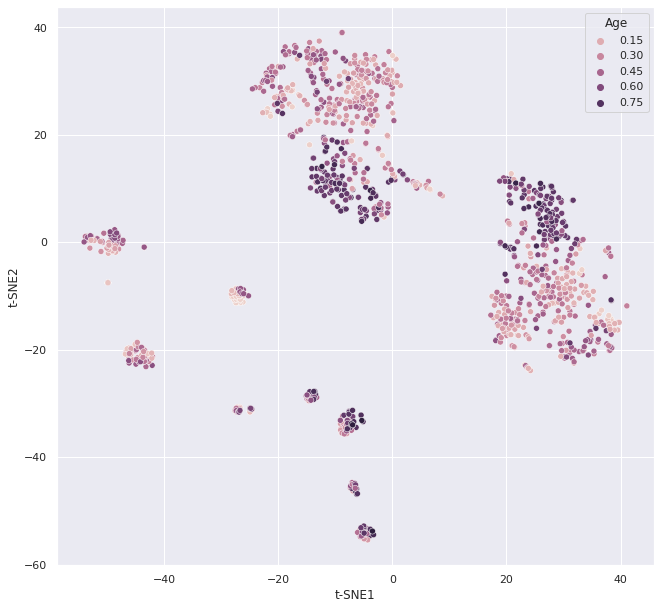

In [20]:
sns.scatterplot(data=df, x="t-SNE1", y="t-SNE2", hue="Age")
sns.set(rc={'figure.figsize':(10.7,20.27)})

In [21]:
x = vae.encode(datawNAN[:, :-1].cuda())
x.shape

torch.Size([1190, 10])

In [23]:
_, _, age = vae.forward(datawNAN[:, :-1].cuda())
# print([x for x in vae._age._model.parameters()])

In [24]:
vae_embedded = TSNE(n_components=2, init='random').fit_transform(x.cpu().detach().numpy())

In [25]:
d_vae = {'t-SNE1': vae_embedded[:, 0], 't-SNE2': vae_embedded[:, 1], 'Age': data[data['Tissue'] == "Brain"]["Age_rel_m"]}
df_vae = pd.DataFrame(data=d_vae)

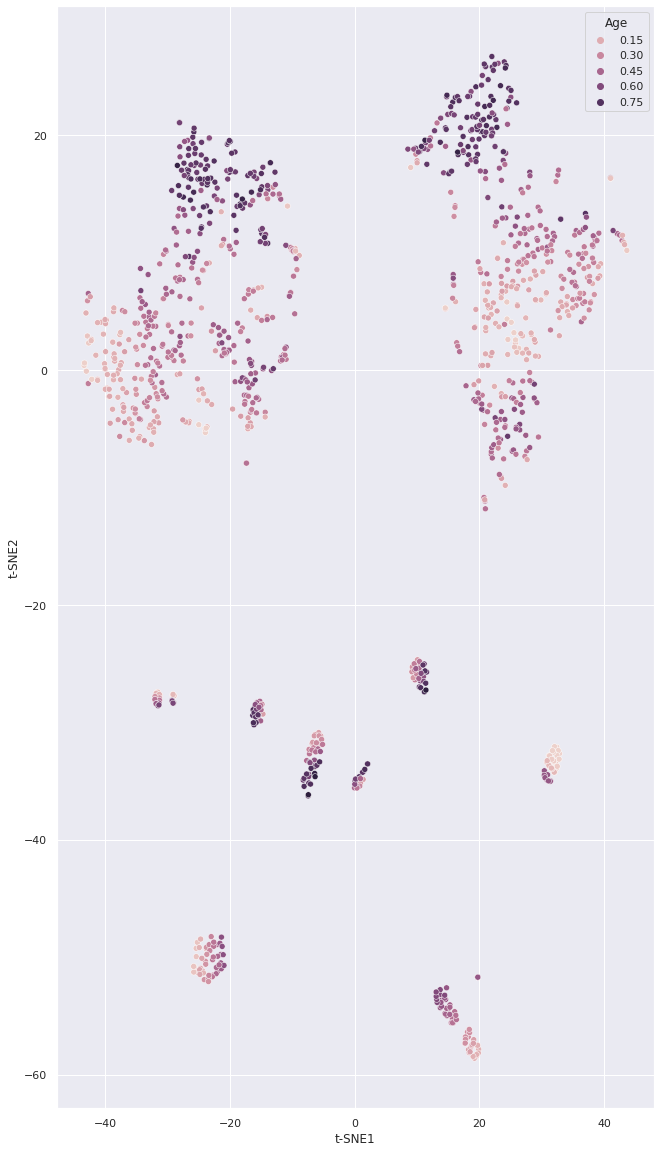

In [26]:
sns.scatterplot(data=df_vae, x="t-SNE1", y="t-SNE2", hue="Age")
sns.set(rc={'figure.figsize':(10.7,10.27)})